In [86]:
import numpy as np
import pandas as pd
import RNA # vienna RNA
import random
import matplotlib.pyplot as pltCRE
import os

In [87]:
path_data='./data/ss_largeSizedDatasetRFAMonly.db'
path_data_output='./data/ss_largeSizedDatasetRFAMonly_mm/'
path_data_subopt_output=path_data_output+'subopt/'
path_data_subopt_all_output=path_data_output+'subopt_all/'

#path_data='./data/sampledata_1_from_56ss_no16S23S_v2.db'
#path_data_output='./data/sampledata_1_from_56ss_no16S23S_v2/'
#path_data_subopt_output=path_data_output+'subopt/'
#path_data_subopt_all_output=path_data_output+'subopt_all/'

import os
for i in os.listdir(path_data_subopt_output):
    os.remove(path_data_subopt_output+i)

import os
for i in os.listdir(path_data_subopt_all_output):
    os.remove(path_data_subopt_all_output+i)

Read db data

In [88]:
f=open(path_data)
rna_id=[]
rna_seq=[]
rna_ss=[]
count=0
for line in f:
    line=line.strip()
    if line.startswith('>'):
        rna_id.append(line.strip('>').replace(';','__'))
        temp='rna_id' 
        count+=1
    elif count==1:
        rna_seq.append(line)
        count+=1   
    elif count==2:
        rna_ss.append(line)
        count=0   

In [89]:
print(rna_id[1])
print(rna_seq[1])
print(rna_ss[1])
print('Number of RNA : '+str(len(rna_id)) )

2_U1_RF00003_X14417
AUACUUACCUGGACGGGGUCAAUGGGUAAUCAAGAAGUUCCAUGGCCUAGGUUGGUGACCUCCAUUGCACUAAGGAGGGGUGCUUGCCUAAGGUCGACCCAAGUGGUUGAGCCUACGUCAUAAUUUGUUGUUGCAGAGGGGGCCUGUGUUCGCGCAGCCCCUAC
...........((((((((((.((((............))))))))))((((.(((..(((((..........))).))..))).)))).(((((((((.....)))))).))).))))....(((((....)))))(((((.(((((....))))))))))..
Number of RNA : 12512


In [90]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__   

Generate subopt for each sequences and output db for each and one db for all

In [91]:
print('Number of RNA : '+str(len(rna_id)))
print(rna_id[0])


Number of RNA : 12512
1_U1_RF00003_X06810


Compute n-motifs rep

In [92]:
import os

#os.system('./software/supernmotifs_ubuntu64_V1.2'+' -i ' + path_data + ' -o '+ path_data_output+' -p 4 -n 1 -m 2')
#os.system('./software/supernmotifs_ubuntu64_V1.2'+' -i ' + path_data + ' -o '+ path_data_output+' -p 4 -n 1')
#os.system('../Workspace_n-motifs/nmotifs_2/nmotifs'+' -i ' + path_data + ' -o '+ path_data_output+' -m 10')
os.system('../Workspace_n-motifs/nmotifs_2/nmotifs'+' -i ' + path_data + ' -o '+ path_data_output+' -n 0 -m 1')


sh: 1: ../Workspace_n-motifs/nmotifs_2/nmotifs: not found


32512

In [93]:
nm_rep_df=pd.read_csv(path_data_output+'matNmRep_SSbyNm.csv',index_col=[0])
#nm_rep_df=pd.read_csv(path_subopts_db_file_all_nmotifs_output+'matNmRep_SSbyNm.csv',index_col=[0])

print(nm_rep_df.shape)
nm_rep_df

(12512, 309)


,B,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_17,...,S_24,S_28,S_3,S_30,S_4,S_5,S_6,S_7,S_8,S_9
,,,,,,,,,,,,,,,,,,,,,
1_U1_RF00003_X06810,3,3,0,0,0,0,0,0,0,0,...,0,0,2,0,1,4,2,0,1,0
2_U1_RF00003_X14417,4,4,0,0,0,0,0,0,0,0,...,0,0,3,0,3,3,2,0,0,0
3_U1_RF00003_Z11883,3,3,0,0,0,0,0,0,0,0,...,0,0,1,0,3,1,1,0,0,0
4_U1_RF00003_X14419,3,3,0,0,0,0,0,0,0,0,...,0,0,3,0,3,2,2,0,0,0
5_U1_RF00003_X14416,4,4,0,0,0,0,0,0,0,0,...,0,0,2,0,3,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113_sau-50_RF02391_ABCP01000020,5,3,0,0,0,0,0,0,0,0,...,0,0,4,0,2,2,0,0,0,0
114_sau-50_RF02391_CP000840,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,2,0,0,0,0
115_sau-50_RF02391_CP002657,5,4,0,0,0,0,0,0,0,0,...,0,0,4,0,3,2,0,0,0,0


In [94]:
name_nm_rep_df=nm_rep_df.index.values
print(name_nm_rep_df)
pos_id_seq=3#RNAFAM
#pos_id_seq=0#RNASTRAND

['1_U1_RF00003_X06810' '2_U1_RF00003_X14417' '3_U1_RF00003_Z11883' ...
 '115_sau-50_RF02391_CP002657' '116_sau-50_RF02391_ADMF01000015'
 '117_sau-50_RF02391_CP002643']


In [95]:
#os.system('./software/supernmotifs_ubuntu64_V1.2'+' -i ' + path_subopts_db_file_all + ' -o '+ path_subopts_db_file_all_nmotifs_output+' -p 4 -g 5')

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
kmer_ = vectorizer.fit_transform(rna_seq)
nm_seq_rep_df=pd.DataFrame(kmer_.toarray(),columns=list(vectorizer.get_feature_names_out()), index=name_nm_rep_df)
print(nm_seq_rep_df.shape)


(12512, 307)


In [96]:
family_nm_rep_df=[i.split('_')[1] for i in name_nm_rep_df]
id_seq_nm_rep_df=[i.split('_')[pos_id_seq] for i in name_nm_rep_df]

nm_rep_df.insert(0, "family", family_nm_rep_df, True)
nm_rep_df.insert(0, "id_seq", id_seq_nm_rep_df, True)
nm_rep_df.insert(0, "sequence", rna_seq, True)
nm_rep_df.insert(0, "structure", rna_ss, True)

nm_rep_df

,structure,sequence,id_seq,family,B,B_1,B_10,B_11,B_12,B_13,...,S_24,S_28,S_3,S_30,S_4,S_5,S_6,S_7,S_8,S_9
,,,,,,,,,,,,,,,,,,,,,
1_U1_RF00003_X06810,....(((((..((((((((((.(((((..........)))))))))...,AUACUUACCUGGACGGGGUCAAUGGAUGAUCAAUAAGGUCCAUGGC...,X06810,U1,3,3,0,0,0,0,...,0,0,2,0,1,4,2,0,1,0
2_U1_RF00003_X14417,...........((((((((((.((((............))))))))...,AUACUUACCUGGACGGGGUCAAUGGGUAAUCAAGAAGUUCCAUGGC...,X14417,U1,4,4,0,0,0,0,...,0,0,3,0,3,3,2,0,0,0
3_U1_RF00003_Z11883,((((.(((.((((....................................,UUACUGGUGGGUGGCGGAGAAGAGAUCGUGACAUCGUAGACCUAUG...,Z11883,U1,3,3,0,0,0,0,...,0,0,1,0,3,1,1,0,0,0
4_U1_RF00003_X14419,...........((((((((((.((((.(........).))))))))...,AUACUUACCUGGACGGGGUCAAUGGGCGAUCAUGAACACCCAUGGC...,X14419,U1,3,3,0,0,0,0,...,0,0,3,0,3,2,2,0,0,0
5_U1_RF00003_X14416,...............(((((.((((((..........)))))))))...,AUACUUACCUGGACGGGGUCUAUGGGCGAUCAUGUAGGUCCAUGGC...,X14416,U1,4,4,0,0,0,0,...,0,0,2,0,3,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113_sau-50_RF02391_ABCP01000020,......(..((((..(((.(.(((((............(((((..(...,UGAAGCCGACCGUUUUGCUGGCGGGUAUUUUGAUGGUUGCACCCGU...,ABCP01000020,sau-50,5,3,0,0,0,0,...,0,0,4,0,2,2,0,0,0,0
114_sau-50_RF02391_CP000840,........(((((...(..((((((((((((..................,UGAAAACAGGUGCUUUGGAAGCUGGUGUAGUCAUUUUCUCACCCGU...,CP000840,sau-50,1,0,0,0,0,0,...,0,0,1,0,1,2,0,0,0,0
115_sau-50_RF02391_CP002657,..((((((.(.((.(.((.((..(((............(((((......,CGAACUUCGGCACGGUCGAUGCGGGGAUCUUCAGGGCUGCGCCGGU...,CP002657,sau-50,5,4,0,0,0,0,...,0,0,4,0,3,2,0,0,0,0


In [97]:
name_nm_seq_rep_df=nm_seq_rep_df.index.values
family_nm_rep_df=[i.split('_')[1] for i in name_nm_seq_rep_df]
id_seq_nm_rep_df=[i.split('_')[pos_id_seq] for i in name_nm_seq_rep_df]

nm_seq_rep_df.insert(0, "family", family_nm_rep_df, True)
nm_seq_rep_df.insert(0, "id_seq", id_seq_nm_rep_df, True)
nm_seq_rep_df.insert(0, "sequence", rna_seq, True)
nm_seq_rep_df.insert(0, "structure", rna_ss, True)

nm_seq_rep_df

,structure,sequence,id_seq,family,aa,aaa,aac,aag,aan,aar,...,ycy,yg,ygu,yu,yua,yuc,yug,yuu,yy,yyu
1_U1_RF00003_X06810,....(((((..((((((((((.(((((..........)))))))))...,AUACUUACCUGGACGGGGUCAAUGGAUGAUCAAUAAGGUCCAUGGC...,X06810,U1,8,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2_U1_RF00003_X14417,...........((((((((((.((((............))))))))...,AUACUUACCUGGACGGGGUCAAUGGGUAAUCAAGAAGUUCCAUGGC...,X14417,U1,8,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3_U1_RF00003_Z11883,((((.(((.((((....................................,UUACUGGUGGGUGGCGGAGAAGAGAUCGUGACAUCGUAGACCUAUG...,Z11883,U1,5,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4_U1_RF00003_X14419,...........((((((((((.((((.(........).))))))))...,AUACUUACCUGGACGGGGUCAAUGGGCGAUCAUGAACACCCAUGGC...,X14419,U1,6,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
5_U1_RF00003_X14416,...............(((((.((((((..........)))))))))...,AUACUUACCUGGACGGGGUCUAUGGGCGAUCAUGUAGGUCCAUGGC...,X14416,U1,3,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113_sau-50_RF02391_ABCP01000020,......(..((((..(((.(.(((((............(((((..(...,UGAAGCCGACCGUUUUGCUGGCGGGUAUUUUGAUGGUUGCACCCGU...,ABCP01000020,sau-50,4,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
114_sau-50_RF02391_CP000840,........(((((...(..((((((((((((..................,UGAAAACAGGUGCUUUGGAAGCUGGUGUAGUCAUUUUCUCACCCGU...,CP000840,sau-50,12,4,6,2,0,0,...,0,0,0,0,0,0,0,0,0,0
115_sau-50_RF02391_CP002657,..((((((.(.((.(.((.((..(((............(((((......,CGAACUUCGGCACGGUCGAUGCGGGGAUCUUCAGGGCUGCGCCGGU...,CP002657,sau-50,4,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
116_sau-50_RF02391_ADMF01000015,.....(((.((.(...((((((.(((....((.((.....)).))....,UGAACUUCGGACGCUUGCCAGCCGGGAUUUCGAGCACUGCGCCCGU...,ADMF01000015,sau-50,4,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0


# Select Family Test

In [98]:
from collections import Counter
print('Original dataset shape %s' % Counter(family_nm_rep_df))

print(len(set(family_nm_rep_df)))

Original dataset shape Counter({'glnA': 956, 'Downstream-peptide': 627, 'C4': 456, 'PhotoRC-II': 445, 'SAM-I-IV-variant': 437, 'SAM': 433, 'Cobalamin': 430, 'group-II-D1D4-3': 406, 'IMES-2': 366, 'PK-G12rRNA': 347, 'IsrR': 308, 'crcB': 287, 'Cyano-1': 265, 'group-II-D1D4-7': 244, 'group-II-D1D4-1': 237, 'IMES-1': 219, 'TwoAYGGAY': 210, 'U2': 208, 'Flavo-1': 201, 'Clostridiales-1': 194, 'manA': 189, 'U6': 188, 'pfl': 182, 'U5': 180, 'group-II-D1D4-6': 174, 'mir-1937': 171, 'U4': 170, 'Entero-5-CRE': 160, 'MOCO-RNA-motif': 160, 'ykoK': 157, 'c-di-GMP-I': 155, '6S': 149, 'Prion-pknot': 148, 'HIV-FE': 145, 'FMN': 144, 'AdoCbl-variant': 144, 'group-II-D1D4-2': 144, 'group-II-D1D4-5': 139, 'potC': 136, 'Purine': 133, 'HIV-PBS': 130, 'radC': 130, 'JUMPstart': 128, 'SAM-II-long-loops': 126, 'mir-154': 121, 'msiK': 120, 'wcaG': 118, 'ar14': 118, 'sau-50': 117, 'FlavivirusDB': 111, 'HCV-SLVII': 110, 'HCV-SLIV': 110, 'HEARO': 110, 'TPP': 109, 'ydaO-yuaA': 106, 'Y-RNA': 104, 'U1': 100, 'MIR169-2':

In [99]:
#family_test='msiK'
family_test='6S'

#family_train='HH'

# Prepare Data for learning, validation and testing

In [100]:
# Validated Structure  
#Train
nm_rep_df_for_learning=nm_rep_df[nm_rep_df['family']!=family_test]
#Test
nm_rep_df_for_testing=nm_rep_df[nm_rep_df['family']==family_test]

# Validated Sequence 
# Train
nm_seq_rep_df_for_learning=nm_seq_rep_df[nm_seq_rep_df['family']!=family_test]
# Test
nm_seq_rep_df_for_testing=nm_seq_rep_df[nm_seq_rep_df['family']==family_test]

In [101]:
##
#CCA => SVD
from sklearn.cross_decomposition import PLSSVD
from sklearn.cross_decomposition import PLSCanonical
from sklearn.cross_decomposition import CCA
from mvlearn.embed import KMCCA
from mvlearn.embed import MVMDS
from sklearn.decomposition import TruncatedSVD
np.random.seed(0)
from mvlearn.embed import DCCA
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X=nm_seq_rep_df_for_learning.drop(["family",'id_seq','structure','sequence'],axis=1)
Y=nm_rep_df_for_learning.drop(["family",'id_seq','structure','sequence'],axis=1)
target=nm_rep_df_for_learning["family"]


###### CCA
pls = PLSCanonical(n_components=200).fit(X, Y)
X_c, Y_c = pls.transform(X, Y)
######

###### Kernel CCA
# pls = KMCCA(n_components=100,kernel='laplacian').fit([X,Y])
# Xs_scores = pls.transform([X, Y])
# X_c=Xs_scores[0]
# Y_c=Xs_scores[1]
######

######
# clf_X = LinearDiscriminantAnalysis()
# clf_X.fit(X,target)
# X_c_lda=clf_X.transform(X)

# clf_Y = LinearDiscriminantAnalysis()
# clf_Y.fit(Y,target)
# Y_c_lda=clf_Y.transform(Y)

# pls = PLSCanonical(n_components=20).fit(X, Y)
# pls.fit(X_c_lda,Y_c_lda)
# X_c, Y_c = pls.transform(X_c_lda, Y_c_lda)
######

###### AJIVE
#from mvlearn.decomposition import AJIVE
#ajive = AJIVE()
#ajive.fit([X.to_numpy(dtype='d'), Y.to_numpy(dtype='d')])
#Xs_transformed = ajive.transform([X.to_numpy(dtype='d'), Y.to_numpy(dtype='d')])
######

###### DCCA

# features1 = X.shape[1]  # Feature sizes
# features2 = Y.shape[1]
# layers1 = [250, 100]  # nodes in each hidden layer and the output size
# layers2 = [250, 100]

# dcca = DCCA(input_size1=features1, input_size2=features2, n_components=50,
#             layer_sizes1=layers1, layer_sizes2=layers2, epoch_num=500)

# dcca = dcca.fit([X, Y])
# Xs_scores = dcca.transform([X, Y])
# X_c=Xs_scores[0]
# Y_c=Xs_scores[1]


######

######
X_testing=nm_seq_rep_df_for_testing.drop(["family",'id_seq','structure','sequence'],axis=1)
Y_testing=nm_rep_df_for_testing.drop(["family",'id_seq','structure','sequence'],axis=1)
target_testing=nm_rep_df_for_testing["family"]
######

In [102]:
nm_rep_df_for_testing

,structure,sequence,id_seq,family,B,B_1,B_10,B_11,B_12,B_13,...,S_24,S_28,S_3,S_30,S_4,S_5,S_6,S_7,S_8,S_9
,,,,,,,,,,,,,,,,,,,,,
1_6S_RF00013_CR543861,.((((((((((((((.(((..((..((((.....(((((((((..(...,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,CR543861,6S,5,5,0,0,0,0,...,0,0,4,0,3,1,1,0,0,1
2_6S_RF00013_AB036820,................((((..((.(((.(((((((((...........,GAGAUUAUGUACUCCACUCCGAUUACCUAGUUUUGACCGAACAUUU...,AB036820,6S,4,4,0,0,0,0,...,0,0,3,0,4,1,0,1,0,0
3_6S_RF00013_AL591979,(((((((((((((((.((.....((((((....((((((((((......,GAAACCCUAAUGUAUUCGAUAUAGUUCCUGAUAUUUUUGAACCGAA...,AL591979,6S,4,4,0,0,0,0,...,0,0,1,0,5,0,2,0,0,0
4_6S_RF00013_BX842646,.(((((((((((.(((.....(((((...((((.(((((((....(...,AGAAGGGUUCGACGGCGUAAAGCUCUAUCGAAAAUAAACCUUACAA...,BX842646,6S,3,2,0,0,0,0,...,0,0,2,0,2,2,1,2,0,0
5_6S_RF00013_AE017355,....(((((((((((.(((..(((..(.((((((((((((.....(...,AAAUUCCUACGGUGUACGUAGCUUAUGCAUGUCUUAAACCAAUAAG...,AE017355,6S,6,5,0,0,0,0,...,0,0,3,0,6,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145_6S_RF00013_CP002469,..(((((((((((((.((((.((.(((((...((((.((((((......,UUUACCCUGGAGUGUUUGUCAGCCGGAUUAAAGUCCCUGAGCCGAU...,CP002469,6S,5,4,0,0,0,0,...,0,0,3,0,3,2,1,0,0,1
146_6S_RF00013_CP002222,.((..((((.(((((.((.((((((((......(((((((((.......,AAAUUACUAAGGUGUGCGCAUUGCUCUAAACAAAGUGUUGCCGAAC...,CP002222,6S,3,3,0,0,0,0,...,0,0,2,0,3,1,1,0,3,0
147_6S_RF00013_CP003056,.....((((((((((.(((((((((((.((((((((((((.........,UACAAGCUGCGUUGUACGUAAUAUUAAUAAAGUUUUAACCUUUAAA...,CP003056,6S,5,3,0,0,0,0,...,0,0,3,0,3,3,2,0,0,1


In [103]:
# corrs = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(100)]    
# plt.plot(corrs)
# plt.xlabel('cca_idx')
# plt.ylabel('cca_corr')
# plt.show()

In [104]:
def compute_subopt_and_bp_distance_against_validatedss(rna_id_current,rna_seq_current,rna_ss_current):
    
    #2.1
    fc = RNA.fold_compound(rna_seq_current)
    ss_subopts=fc.subopt_zuker()
    #select the first n sub opt
    #Hyperparameter
    nb_ss_subopt=50
    seq_is_subopt=[]

    #if nb_ss_subopt>len(ss_subopts):
    #    nb_ss_subopt=len(ss_subopts)
    ss_subopts=ss_subopts[0:nb_ss_subopt]
    
    for j in range(len(ss_subopts)):
        seq_is_subopt.append('__is_subopt_1')
        
    #Stochastic Sampling
#     ss_subopts=[]
#     nb_ss_subopt=10
#     seq_mut_id=[]
#     seq_is_subopt=[]
    
#     fc = RNA.fold_compound(rna_seq_current)
#     (mfe_struct, mfe) = fc.mfe()

    
#     #create model details
#     md = RNA.md()
#     # activate unique multibranch loop decomposition
#     md.uniq_ML = 1
#     # create fold compound object
#     fc = RNA.fold_compound(rna_seq_current, md)
#     # compute MFE
#     (ss, mfe) = fc.mfe()
#     # rescale Boltzmann factors according to MFE
#     fc.exp_params_rescale(mfe)
#     # compute partition function to fill DP matrices
#     fc.pf()
#     ss_subopts.append(dotdict({'structure':mfe_struct})) 
    
#     for s in fc.pbacktrack(nb_ss_subopt):
#         ss_subopts.append(dotdict({'structure':s})) 
        
#     for j in range(len(ss_subopts)):
#         seq_is_subopt.append('__is_subopt_1')    
        
    #write subopts in file
    path_subopts_db_file_current=path_data_subopt_output+rna_id_current+'.db'
    ss_subopts_bp_scores=[]
    count=0
    
    with open(path_subopts_db_file_current, 'w') as the_file:
        
        the_file.write('>'+rna_id_current+'__'+'0_0'+'__is_subopt_0'+'__ss_0'+'\n')
        the_file.write(rna_seq_current+'\n')
        the_file.write(rna_ss_current+'\n')
        
        for subopt in ss_subopts:
            
            ss_subopts_bp_score=RNA.bp_distance(subopt.structure,rna_ss_current)/(subopt.structure.count('(')+rna_ss_current.count('('))
                        
            the_file.write('>'+rna_id_current+'__'+str(round(ss_subopts_bp_score,2)).replace('.','_')+seq_is_subopt[count]+'__ss_'+str(count) +'\n')
            the_file.write(rna_seq_current+'\n')
            the_file.write(subopt.structure+'\n')
            ss_subopts_bp_scores.append(ss_subopts_bp_score)
            
            count+=1
            
    return (path_subopts_db_file_current)

In [105]:
name_nm_rep_df_for_testing=nm_rep_df_for_testing.index.values

from tqdm import tqdm
rna_ss_subopts=[]
path_subopts_db_file=[]

for i in tqdm(range(len(name_nm_rep_df_for_testing))):
    path_subopts_db_file.append(compute_subopt_and_bp_distance_against_validatedss(name_nm_rep_df_for_testing[i],nm_rep_df_for_testing['sequence'][i],nm_rep_df_for_testing['structure'][i]))

100%|██████████| 149/149 [00:29<00:00,  5.06it/s]


In [106]:
#Output and read general db
path_subopts_db_file_all=path_data_subopt_all_output+'subopt_all.db'
concat_db_command='cat ' + ' '.join(path_subopts_db_file) +' > '+path_subopts_db_file_all
os.system(concat_db_command)

f=open(path_subopts_db_file_all)
rna_id=[]
rna_seq=[]
rna_ss_subopt=[]
count=0
for line in f:
    line=line.strip()
    if line.startswith('>'):
        rna_id.append(line.strip('>'))
        temp='rna_id' 
        count+=1
    elif count==1:
        rna_seq.append(line)
        count+=1   
    elif count==2:
        rna_ss_subopt.append(line)
        count=0 

In [107]:
import os
os.system('./software/nmotifs'+' -i ' + path_subopts_db_file_all + ' -o '+ path_data_subopt_all_output+' -n 0 -m 1')


sh: 1: ../Workspace_n-motifs/nmotifs_2/nmotifs: not found


32512

In [108]:
nm_rep_df_for_testing_subopt=pd.read_csv(path_data_subopt_all_output+'matNmRep_SSbyNm.csv',index_col=[0])
#nm_rep_df=pd.read_csv(path_subopts_db_file_all_nmotifs_output+'matNmRep_SSbyNm.csv',index_col=[0])

print(nm_rep_df_for_testing_subopt.shape)
nm_rep_df_for_testing_subopt

FileNotFoundError: [Errno 2] No such file or directory: './data/ss_largeSizedDatasetRFAMonly_mm/subopt_all/matNmRep_SSbyNm.csv'

In [ ]:
name_nm_rep_df_for_testing_subopt=nm_rep_df_for_testing_subopt.index.values
len(list(name_nm_rep_df_for_testing_subopt))

3874

In [ ]:
len(rna_seq)

3874

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
kmer_ = vectorizer.fit_transform(rna_seq)
nm_seq_rep_df_for_testing_subopt=pd.DataFrame(kmer_.toarray(),columns=list(vectorizer.get_feature_names_out()), index=name_nm_rep_df_for_testing_subopt)
print(nm_seq_rep_df_for_testing_subopt.shape)

ValueError: Shape of passed values is (15049, 80), indices imply (3874, 80)

In [ ]:
family_nm_rep_df_for_testing_subopt=[i.split('_')[1] for i in name_nm_rep_df_for_testing_subopt]
id_seq_nm_rep_df_for_testing_subopt=[i.split('_')[pos_id_seq] for i in name_nm_rep_df_for_testing_subopt]
is_subopt=[i.split('__')[2] for i in name_nm_rep_df_for_testing_subopt]
bd_distance=[float(i.split('__')[1].replace('_','.')) for i in name_nm_rep_df_for_testing_subopt]

nm_rep_df_for_testing_subopt.insert(0, "family", family_nm_rep_df_for_testing_subopt, True)
nm_rep_df_for_testing_subopt.insert(0, "id_seq", id_seq_nm_rep_df_for_testing_subopt, True)
nm_rep_df_for_testing_subopt.insert(0, "is_subopt", is_subopt, True)
nm_rep_df_for_testing_subopt.insert(0, "sequence", rna_seq, True)
nm_rep_df_for_testing_subopt.insert(0, "bd_distance", bd_distance, True)

nm_rep_df_for_testing_subopt

,bd_distance,sequence,is_subopt,id_seq,family,B,B_1,B_10,B_11,B_12,...,S_16,S_17,S_2,S_3,S_4,S_5,S_6,S_7,S_8,S_9
,,,,,,,,,,,,,,,,,,,,,
1_6S_RF00013_CR543861__0_0__is_subopt_0__ss_0,0.00,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_0,CR543861,6S,5,5,0,0,0,...,0,0,2,4,3,1,1,0,0,1
1_6S_RF00013_CR543861__0_08__is_subopt_1__ss_0,0.08,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_1,CR543861,6S,4,4,0,0,0,...,0,0,2,4,2,1,2,0,1,1
1_6S_RF00013_CR543861__0_07__is_subopt_1__ss_1,0.07,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_1,CR543861,6S,4,4,0,0,0,...,0,0,2,4,2,2,1,0,0,2
1_6S_RF00013_CR543861__0_1__is_subopt_1__ss_2,0.10,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_1,CR543861,6S,4,4,0,0,0,...,0,0,3,4,2,1,2,0,1,1
1_6S_RF00013_CR543861__0_12__is_subopt_1__ss_3,0.12,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_1,CR543861,6S,3,3,0,0,0,...,0,0,3,4,2,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149_6S_RF00013_AY345075__0_23__is_subopt_1__ss_20,0.23,UAUUAGCUGCUUGGUUCGUGAGCUUAAUAUUAACCUAGGACUACCA...,is_subopt_1,AY345075,6S,3,3,0,0,0,...,0,0,1,2,4,1,2,1,0,0
149_6S_RF00013_AY345075__0_18__is_subopt_1__ss_21,0.18,UAUUAGCUGCUUGGUUCGUGAGCUUAAUAUUAACCUAGGACUACCA...,is_subopt_1,AY345075,6S,4,3,0,0,0,...,0,0,2,2,4,1,2,1,0,0
149_6S_RF00013_AY345075__0_09__is_subopt_1__ss_22,0.09,UAUUAGCUGCUUGGUUCGUGAGCUUAAUAUUAACCUAGGACUACCA...,is_subopt_1,AY345075,6S,3,3,0,0,0,...,0,0,0,2,4,1,2,1,0,0


In [ ]:
name_nm_seq_rep_df_for_testing_subopt=nm_seq_rep_df_for_testing_subopt.index.values
family_nm_seq_rep_df_for_testing_subopt=[i.split('_')[1] for i in name_nm_seq_rep_df_for_testing_subopt]
id_seq_nm_seq_rep_df_for_testing_subopt=[i.split('_')[pos_id_seq] for i in name_nm_seq_rep_df_for_testing_subopt]
is_subopt=[i.split('__')[2] for i in name_nm_seq_rep_df_for_testing_subopt]
bd_distance=[float(i.split('__')[1].replace('_','.')) for i in name_nm_seq_rep_df_for_testing_subopt]

nm_seq_rep_df_for_testing_subopt.insert(0, "family", family_nm_seq_rep_df_for_testing_subopt, True)
nm_seq_rep_df_for_testing_subopt.insert(0, "id_seq", id_seq_nm_seq_rep_df_for_testing_subopt, True)
nm_seq_rep_df_for_testing_subopt.insert(0, "is_subopt", is_subopt, True)
nm_seq_rep_df_for_testing_subopt.insert(0, "sequence", rna_seq, True)
nm_seq_rep_df_for_testing_subopt.insert(0, "bd_distance", bd_distance, True)

nm_seq_rep_df_for_testing_subopt

,bd_distance,sequence,is_subopt,id_seq,family,aa,aaa,aac,aag,aau,...,ug,uga,ugc,ugg,ugu,uu,uua,uuc,uug,uuu
1_6S_RF00013_CR543861__0_0__is_subopt_0__ss_0,0.00,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_0,CR543861,6S,8,1,2,3,2,...,10,3,4,1,2,12,3,4,2,2
1_6S_RF00013_CR543861__0_08__is_subopt_1__ss_0,0.08,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_1,CR543861,6S,8,1,2,3,2,...,10,3,4,1,2,12,3,4,2,2
1_6S_RF00013_CR543861__0_07__is_subopt_1__ss_1,0.07,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_1,CR543861,6S,8,1,2,3,2,...,10,3,4,1,2,12,3,4,2,2
1_6S_RF00013_CR543861__0_1__is_subopt_1__ss_2,0.10,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_1,CR543861,6S,8,1,2,3,2,...,10,3,4,1,2,12,3,4,2,2
1_6S_RF00013_CR543861__0_12__is_subopt_1__ss_3,0.12,UUGUCUCUGGGAUGCUCGCCAGCGAGUCAGAAUCCCCUGAGCCGAU...,is_subopt_1,CR543861,6S,8,1,2,3,2,...,10,3,4,1,2,12,3,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149_6S_RF00013_AY345075__0_23__is_subopt_1__ss_20,0.23,UAUUAGCUGCUUGGUUCGUGAGCUUAAUAUUAACCUAGGACUACCA...,is_subopt_1,AY345075,6S,13,2,3,5,3,...,7,3,1,1,2,18,7,2,2,7
149_6S_RF00013_AY345075__0_18__is_subopt_1__ss_21,0.18,UAUUAGCUGCUUGGUUCGUGAGCUUAAUAUUAACCUAGGACUACCA...,is_subopt_1,AY345075,6S,13,2,3,5,3,...,7,3,1,1,2,18,7,2,2,7
149_6S_RF00013_AY345075__0_09__is_subopt_1__ss_22,0.09,UAUUAGCUGCUUGGUUCGUGAGCUUAAUAUUAACCUAGGACUACCA...,is_subopt_1,AY345075,6S,13,2,3,5,3,...,7,3,1,1,2,18,7,2,2,7
149_6S_RF00013_AY345075__0_28__is_subopt_1__ss_23,0.28,UAUUAGCUGCUUGGUUCGUGAGCUUAAUAUUAACCUAGGACUACCA...,is_subopt_1,AY345075,6S,13,2,3,5,3,...,7,3,1,1,2,18,7,2,2,7


In [ ]:
def align_nm_seq_rep_to_a_ref(nmseq_to_align,nmseq_ref):
    nmseq_aligned_to_ref=pd.concat([nmseq_to_align,nmseq_ref], join='outer',axis=0) # Concat along y axis
    nmseq_aligned_to_ref=nmseq_aligned_to_ref[list(nmseq_ref.columns)] # keep only training set column
    nmseq_aligned_to_ref=nmseq_aligned_to_ref.fillna(0)#replace nan by zeros
    nmseq_aligned_to_ref=nmseq_aligned_to_ref.iloc[0:nmseq_to_align.shape[0]]#extract subopt vectors
    return(nmseq_aligned_to_ref)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

name_nm_rep_df_for_testing_subopt=nm_rep_df_for_testing_subopt.index.values
id_seq_nm_rep_df_for_testing_subopt=[i.split('_')[pos_id_seq] for i in name_nm_rep_df_for_testing_subopt]
unique_list_id=list(set(id_seq_nm_rep_df_for_testing_subopt))

best_res=[]
mfe_res=[]
emb_res=[]

#id_seq_current=unique_list_id[55]
#print(id_seq_current)    
for i in tqdm(range(len(unique_list_id))):

    id_seq_current=unique_list_id[i]
    nm_rep_df_for_testing_subopt_id_seq_current=nm_rep_df_for_testing_subopt[nm_rep_df_for_testing_subopt['id_seq']==id_seq_current]
    nm_rep_df_for_testing_subopt_id_seq_current=nm_rep_df_for_testing_subopt_id_seq_current[nm_rep_df_for_testing_subopt_id_seq_current['is_subopt'] == 'is_subopt_1']
    nm_seq_rep_df_for_testing_subopt_id_seq_current=nm_seq_rep_df_for_testing_subopt[nm_seq_rep_df_for_testing_subopt['id_seq']==id_seq_current]
    nm_seq_rep_df_for_testing_subopt_id_seq_current=nm_seq_rep_df_for_testing_subopt_id_seq_current[nm_seq_rep_df_for_testing_subopt_id_seq_current['is_subopt'] == 'is_subopt_1']

    X_subopt_testing=nm_seq_rep_df_for_testing_subopt_id_seq_current.drop(["family",'id_seq','is_subopt','sequence','bd_distance'],axis=1)
    Y_subopt_testing=nm_rep_df_for_testing_subopt_id_seq_current.drop(["family",'id_seq','is_subopt','sequence','bd_distance'],axis=1)


#     import warnings
#     warnings.filterwarnings('ignore')

#     Y_subopt_testing_parsed=pd.DataFrame()
#     list_colf_ref=list(Y.columns)
#     list_colf_subopt=list(Y_subopt_testing.columns)
#     for ind_col_ref in range(len(list_colf_ref)):
#         if  list_colf_ref[ind_col_ref] in list_colf_subopt:
#             Y_subopt_testing_parsed[list_colf_ref[ind_col_ref]]=Y_subopt_testing[list_colf_ref[ind_col_ref]]
#         else:
#             Y_subopt_testing_parsed[list_colf_ref[ind_col_ref]]=0   

            
#     X_subopt_testing_parsed=pd.DataFrame()
#     list_colf_ref=list(X.columns)
#     list_colf_subopt=list(X_subopt_testing.columns)
#     for ind_col_ref in range(len(list_colf_ref)):
#         if  list_colf_ref[ind_col_ref] in list_colf_subopt:
#             X_subopt_testing_parsed[list_colf_ref[ind_col_ref]]=X_subopt_testing[list_colf_ref[ind_col_ref]]
#         else:
#             X_subopt_testing_parsed[list_colf_ref[ind_col_ref]]=0 

#     warnings.filterwarnings('default')
    
    Y_subopt_testing_parsed=align_nm_seq_rep_to_a_ref(Y_subopt_testing,Y)
    X_subopt_testing_parsed=align_nm_seq_rep_to_a_ref(X_subopt_testing,X)

    
    from scipy.stats import entropy
    def entropy1(labels, base=None):
        value,counts = np.unique(labels, return_counts=True)
        return entropy(counts, base=base)
    import math
    weight_score_global=1/np.exp(Y_subopt_testing_parsed.apply(entropy1))#
    
    for col in Y_subopt_testing_parsed.columns:
        Y_subopt_testing_parsed[col]*=weight_score_global[col]   
        
#     from scipy.stats import entropy
#     def entropy1(labels, base=None):
#         value,counts = np.unique(labels, return_counts=True)
#         return entropy(counts, base=base)
#     import math
#     weight_score_global=1/np.exp(X_subopt_testing_parsed.apply(entropy1))#
    
#     for col in X_subopt_testing_parsed.columns:
#         X_subopt_testing_parsed[col]*=weight_score_global[col]  
    
    ######
    #X_subopt_testing_parsed_c,Y_subopt_testing_parsed_c= pls.transform(X_subopt_testing_parsed,Y_subopt_testing_parsed)
    ######
    
    ######
    # X_subopt_testing_parsed_c_lda=clf_X.transform(X_subopt_testing_parsed)
    # Y_subopt_testing_parsed_c_lda=clf_Y.transform(Y_subopt_testing_parsed)
    # X_subopt_testing_parsed_c,Y_subopt_testing_parsed_c= pls.transform(X_subopt_testing_parsed_c_lda,Y_subopt_testing_parsed_c_lda)
    
    ######
    
    X_subopt_testing_parsed_c,Y_subopt_testing_parsed_c= pls.transform(X_subopt_testing_parsed,Y_subopt_testing_parsed)

    
    # X_Y_subopt_testing_parsed_c_scores = pls.transform([X_subopt_testing_parsed, Y_subopt_testing_parsed])
    # X_subopt_testing_parsed_c=X_Y_subopt_testing_parsed_c_scores[0]
    # Y_subopt_testing_parsed_c=X_Y_subopt_testing_parsed_c_scores[1]
    
    ######
    #X_Y_subopt_testing_parsed_c_scores= dcca.transform([X_subopt_testing_parsed,Y_subopt_testing_parsed])
    #X_subopt_testing_parsed_c=X_Y_subopt_testing_parsed_c_scores[0]
    #Y_subopt_testing_parsed_c=X_Y_subopt_testing_parsed_c_scores[1]
    ######
    
    #temp1_cent_vect=pd.DataFrame(np.average(X_subopt_testing_parsed_c, axis=0))
    #temp2_dist=1-(cosine_similarity(Y_subopt_testing_parsed_c, temp1_cent_vect.values.reshape(1, -1)))
    #Y_subopt_testing_parsed_c=Y_subopt_testing_parsed_c*temp2_dist

    #centroid_vect=pd.DataFrame(np.average(Z_svd, axis=0)) ################
    #centroid_vect=pd.DataFrame(np.average(Y_subopt_testing_parsed_c, axis=0)) ################
    centroid_vect=pd.DataFrame(np.average(Y_subopt_testing_parsed, axis=0)) ################
    #centroid_vect=pd.DataFrame(X_subopt_testing_parsed_c[0]) ################

    #dist_to_centroid=1-(cosine_similarity(Y_subopt_testing_parsed_c, centroid_vect.values.reshape(1, -1))) ######################
    dist_to_centroid=1-(cosine_similarity(Y_subopt_testing_parsed, centroid_vect.values.reshape(1, -1))) ######################
    #dist_to_centroid=(pairwise_distances(Y_subopt_testing_parsed_c, centroid_vect.values.reshape(1, -1), metric='euclidean')) 
    #dist_to_centroid=np.round(dist_to_centroid,2)
    
    #dist_to_centroid=1-(cosine_similarity(Y_subopt_testing_c, centroid_vect.values.reshape(1, -1))) ######################
    #dist_to_centroid=1-(cosine_similarity(Y_subopt_testing_c, Y_c)) ######################
    #dist_to_centroid=(pairwise_distances(Y_subopt_testing, centroid_vect.values.reshape(1, -1), metric='manhattan')) 

    id_seq_closest_to_centroid=nm_rep_df_for_testing_subopt_id_seq_current.index.values[np.argmin(dist_to_centroid.flatten())] ###################


    best_res.append(nm_rep_df_for_testing_subopt_id_seq_current.loc[nm_rep_df_for_testing_subopt_id_seq_current['bd_distance'].idxmin()]['bd_distance'])
    mfe_res.append(nm_rep_df_for_testing_subopt_id_seq_current['bd_distance'][0])
    #emb_res.append(nm_rep_df_for_testing_subopt_id_seq_current['bd_distance'][10])
    emb_res.append(nm_rep_df_for_testing_subopt_id_seq_current.loc[id_seq_closest_to_centroid]['bd_distance'])



100%|███████████████████████████████████| 146/146 [00:22<00:00,  6.40it/s]


In [ ]:
dist_to_centroid

array([[0.00456922],
       [0.01944982],
       [0.01918709],
       [0.00456922],
       [0.02097547],
       [0.02253768],
       [0.01728371],
       [0.01056961],
       [0.01480751],
       [0.02119769],
       [0.03498885],
       [0.02102229],
       [0.02120411],
       [0.00989858],
       [0.02485174],
       [0.0166216 ],
       [0.01915551],
       [0.03053625],
       [0.0285758 ],
       [0.01480876],
       [0.01620953],
       [0.03645399],
       [0.01867477],
       [0.02910262],
       [0.01869892]])

In [ ]:
print(np.median(best_res))
print(np.median(mfe_res))
print(np.median(emb_res))

0.06
0.26
0.23


In [ ]:
print(np.mean(best_res))
print(np.mean(mfe_res))
print(np.mean(emb_res))

0.1097260273972603
0.2658219178082192
0.25986301369863013


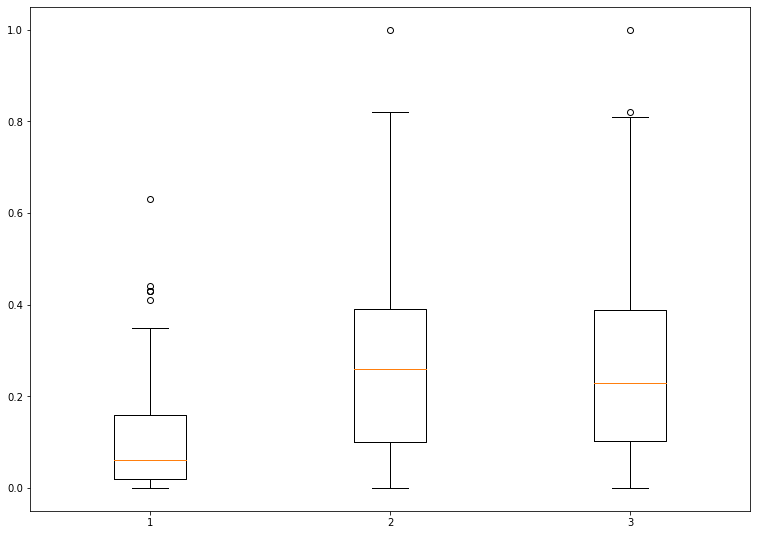

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
#Creating dataset
 
data = [best_res, mfe_res, emb_res]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1,1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()